   # Machine Learning 1
   Answers from questions 1 to 5 
    1.The three stages of building the model in machine learning:
          
          a.Model Buliding
      
          b.Model Testing 
          
          C.Applying the model.
          
    2.The standard approach to supervised learning is to split the set of example into the training set and the test.
 
    3.Trainig set - A set of data is used to discover the potentially predictive relationship known as trainig set.

       Test set -  Test set is used to test the accuracy of the hypotheses generated by the learner.
       
    4.Ensemble learning helps improve machine learning results by combining several models. This approach allows the production of better predictive performance compared to a single model. 
    Bagging - Bagging is a method in ensemble for improving unstable estimation or classification schemes.
    Boosting - Boosting method are used sequentially to reduce the bias of the combined model.
    
    5.By using a lot of data overfitting can be avoided, overfitting happens relatively as you have a small dataset, and you try to learn from it.
        

# Machine Learning 2

In [44]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_boston
boston = load_boston()
print(boston)

df_x = pd.DataFrame(boston.data, columns = boston.feature_names)
df_y = pd.DataFrame(boston.target)

df_x.describe()

reg = linear_model.LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

reg.fit(x_train, y_train)

print(reg.coef_)

y_pred = reg.predict(x_test)
print(y_pred)

y_pred[2]

y_test[0]

print(np.mean((y_pred-y_test)**2))

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

# Machine Learning 3

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


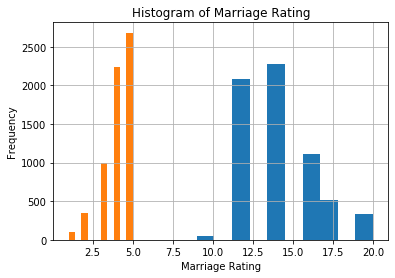

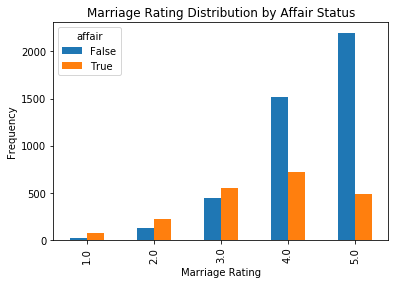

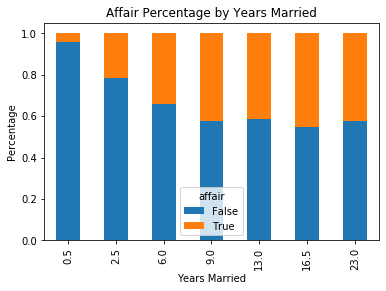

In [46]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score


dta = sm.datasets.fair.load_pandas().data

dta['affair'] = (dta.affairs > 0).astype(int)

dta.groupby('affair').mean()



dta.groupby('rate_marriage').mean()

%matplotlib inline

dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

dta.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

affair_yrs_married = pd.crosstab(dta.yrs_married, dta.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  dta, return_type="dataframe")
print (X.columns)
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)

# Machine Learning 4

In [175]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
titanic = pd.read_csv("https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv")
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
# Dropping columns not used for prediction
titanic.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1,inplace=True)

print(titanic.isnull().any())

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
dtype: bool


In [176]:
age_mean = round(np.mean(titanic['Age']))
titanic['Age'].fillna(age_mean,inplace=True)
titanic.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
dtype: bool

In [177]:
titanic['Sex'] = titanic['Sex'].apply(lambda x:1 if x == 'male' else 0)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
5,0,3,1,30.0,0,0,8.4583
6,0,1,1,54.0,0,0,51.8625
7,0,3,1,2.0,3,1,21.0750
8,1,3,0,27.0,0,2,11.1333
9,1,2,0,14.0,1,0,30.0708


In [178]:
# The dataset for Statistical data analysis
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.758889,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.002570,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


# Decision Tree

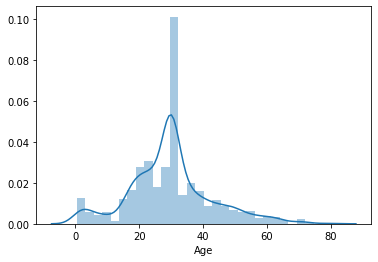

In [179]:
import seaborn as sns
sns.distplot(titanic['Age'])

In [180]:
def age_category(age):
    if age < 12:
        return 0
    elif age <= 20:
        return 1
    elif age <= 35:
        return 2
    elif age <= 50:
        return 3
    else:
        return 4
    
titanic['Age'] = titanic['Age'].apply(age_category)

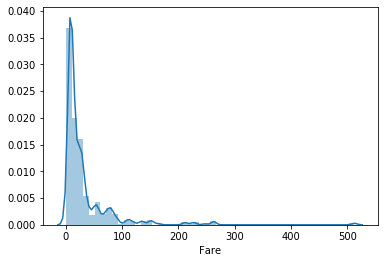

In [181]:
titanic.Age.unique()
sns.distplot(titanic['Fare'])

In [182]:
titanic['Fare'].describe()
def fare_category(fare):
    if fare <= 7.91:
        return 0
    elif fare <= 14.45:
        return 1
    elif fare <= 31:
        return 2
    else:
        return 3
titanic['Fare'] = titanic['Fare'].apply(fare_category)

In [183]:
titanic.Fare.unique()

array([0, 3, 1, 2], dtype=int64)

In [184]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int64
dtypes: int64(7)
memory usage: 48.8 KB


In [185]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,2.038159,0.523008,0.381594,1.505051
std,0.486592,0.836071,0.477990,0.942566,1.102743,0.806057,1.118148
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.500000
50%,0.000000,3.000000,1.000000,2.000000,0.000000,0.000000,2.000000
75%,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,2.000000
max,1.000000,3.000000,1.000000,4.000000,8.000000,6.000000,3.000000


# Training and Evaluating the model

In [186]:
# Splitting the data for training and testing set
y = titanic['Survived']
X = titanic.drop(['Survived'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
print("Shape of Training set:",X_train.shape)
print("Shape of labelled data for Training:",y_train.shape)
print("Shape of Testing set:",X_test.shape)
print("Shape of labelled data for Testing:",y_test.shape)

Shape of Training set: (712, 6)
Shape of labelled data for Training: (712,)
Shape of Testing set: (179, 6)
Shape of labelled data for Testing: (179,)


In [187]:
# Fitting the model
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

dec_tree.fit(X_train,y_train)
print("Accuracy of DecisionTree classifier on training")

Accuracy of DecisionTree classifier on training


In [188]:
# Prediction of results
y_pred = dec_tree.predict(X_test)
output_df = pd.DataFrame({'TestSet':y_test,'Predicted':y_pred})
print(output_df)
print("Accuracy of DecisionTree classifier on testing set: {:.2f}".format(dec_tree.score(X_test,y_test)))

     TestSet  Predicted
707        1          0
37         0          0
615        1          1
169        0          1
68         1          0
606        0          0
630        1          0
785        0          0
660        1          0
728        0          0
20         0          0
486        1          1
15         1          1
692        1          1
643        1          1
192        1          1
65         1          0
597        0          0
702        0          1
280        0          0
505        0          0
128        1          0
333        0          0
402        0          0
143        0          0
172        1          0
458        1          1
137        0          0
355        0          0
317        0          0
..       ...        ...
417        1          1
62         0          0
18         0          1
814        0          0
197        0          0
198        1          1
663        0          0
447        1          0
496        1          1
22         1    

In [189]:
# Calculating metrics for evaluation of the model
cm = metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)
print()
print("Classification Report:\n",metrics.classification_report(y_test,y_pred))
print()
print("Model's accuracy score is: %0.2f"%metrics.accuracy_score(y_pred,y_test))

Confusion Matrix:
 [[90 10]
 [28 51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.83       100
           1       0.84      0.65      0.73        79

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.78       179


Model's accuracy score is: 0.79


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
boston = datasets.load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
targets = boston.target

In [168]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
features.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

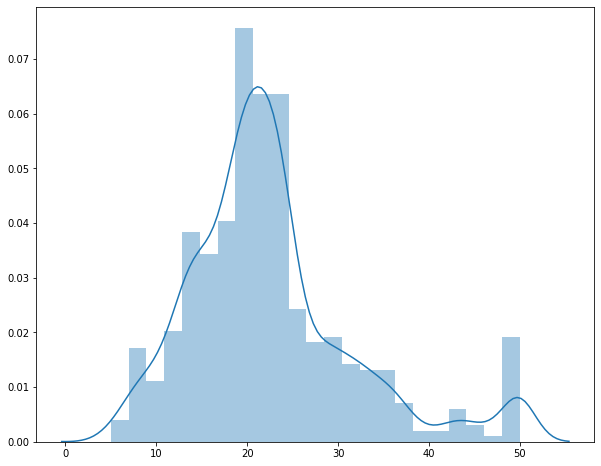

In [6]:
target_df=pd.DataFrame(targets)
target_df.describe()
import seaborn as sns
a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(target_df)

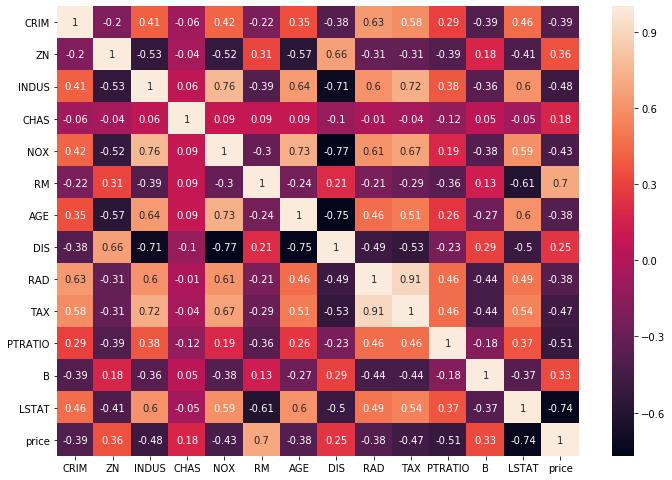

In [14]:
features['price']=targets
corr_matrix=features.corr().round(2)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(ax=ax,data=corr_matrix,annot=True)

In [17]:
X = features[['LSTAT','RM']]
print(X.head())
y = features['price']
print("\nPrice Data:")
print(y.head())

   LSTAT     RM
0   4.98  6.575
1   9.14  6.421
2   4.03  7.185
3   2.94  6.998
4   5.33  7.147

Price Data:
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64


#  Training and Evaluating the model

In [18]:
# Splitting data to training and testing set and normalizing the data to avoid skewness due to variance
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

In [19]:
# Model fitting
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50, random_state=0)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [23]:
# Model Prediction and Evaluation
from sklearn import metrics
y_pred_train = rf.predict(X_train_scaled)

print("Original output for Training set:")
print(y_train[0:5])
print("Predicted output for Training set:")
print(y_pred_train[:5])
print()

y_pred_test = rf.predict(X_test_scaled)
print("Original output for Testing set:")
print(y_test[0:5])
print("Predicted output for Testing set:")
print(y_pred_test[:5])
print()

Original output for Training set:
477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
Name: price, dtype: float64
Predicted output for Training set:
[12.73  21.448 18.36  12.964 18.528]

Original output for Testing set:
173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: price, dtype: float64
Predicted output for Testing set:
[21.908 34.852 19.582 24.156 15.81 ]



In [24]:
# calculate MAE, MSE, RMSE for training set
print("Testing the performance of the model for Training data:")
print("Mean Absolute Error:",metrics.mean_absolute_error(y_train,y_pred_train))
print("Mean Squared Error:",metrics.mean_squared_error(y_train,y_pred_train))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
print()
#Evaluating for testing set
# calculate MAE, MSE, RMSE for training set
print("Testing the performance of the model for Testing data:")
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred_test))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred_test))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

Testing the performance of the model for Training data:
Mean Absolute Error: 1.2390643564356445
Mean Squared Error: 3.669734722772279
Root Mean Squared Error: 1.9156551680227523

Testing the performance of the model for Testing data:
Mean Absolute Error: 3.1433529411764685
Mean Squared Error: 21.982306627450967
Root Mean Squared Error: 4.688529260594517


# Machine Learning 6

In [13]:
import numpy as np
import pandas as pd
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education','education_num', 'marital_status', 'occupation','relationship', 'race','sex','capital_gain','capital_loss','hours_per_week','native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [25]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
#Creating an income column (target variable) based on wage class column
df = pd.concat([train_set, test_set], axis=0) # Combining both train and test data to single DF for data cleaning and preprocessing
print(df.wage_class.unique())
print()
df['income'] = df['wage_class'].apply(lambda x: 0 if '<=50K' in x else 1)
df.describe()

[' <=50K' ' >50K' ' <=50K.' ' >50K.']



,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [28]:
# Replace ? in columns with NaN
df.replace(' ?', np.nan, inplace=True)

In [29]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [137]:
# Creating dummy columns for all nominal data 
df = pd.concat([df,pd.get_dummies(df['workclass'],prefix='WorkClass',prefix_sep=':')],axis=1)
df = pd.concat([df,pd.get_dummies(df['marital_status'],prefix='MaritalStatus',prefix_sep=':')],axis=1)
df = pd.concat([df,pd.get_dummies(df['occupation'],prefix='Occupation',prefix_sep=':')],axis=1)
df = pd.concat([df,pd.get_dummies(df['relationship'],prefix='Relationship',prefix_sep=':')],axis=1)
df = pd.concat([df,pd.get_dummies(df['race'],prefix='Race',prefix_sep=':')],axis=1)
df = pd.concat([df,pd.get_dummies(df['sex'],prefix='Sex',prefix_sep=':')],axis=1)
df = pd.concat([df,pd.get_dummies(df['native_country'],prefix='NativeCountry',prefix_sep=':')],axis=1)

In [138]:
# Dropping the nominal columns since they have already been dummified
df.drop('workclass',axis=1,inplace=True)
df.drop('occupation',axis=1,inplace=True)
df.drop('education',axis=1,inplace=True)
df.drop('relationship',axis=1,inplace=True)
df.drop('marital_status',axis=1,inplace=True)
df.drop('race',axis=1,inplace=True)
df.drop('sex',axis=1,inplace=True)
df.drop('native_country',axis=1,inplace=True)

# Training and Testing the model


In [139]:
# Writing clean data to a file due to memory constraints
df.to_csv('clean_data.csv')

In [140]:
import pandas as pd
df3=pd.read_csv('clean_data.csv')

In [142]:
df.head()
df.drop('wage_class',axis=1,inplace=True)

In [143]:
from sklearn.model_selection import train_test_split
y = df['income']
X = df.drop('income',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [144]:
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,WorkClass: Federal-gov,WorkClass: Local-gov,WorkClass: Never-worked,WorkClass: Private,...,NativeCountry: Portugal,NativeCountry: Puerto-Rico,NativeCountry: Scotland,NativeCountry: South,NativeCountry: Taiwan,NativeCountry: Thailand,NativeCountry: Trinadad&Tobago,NativeCountry: United-States,NativeCountry: Vietnam,NativeCountry: Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [157]:
!pip -V

pip 20.0.2 from c:\users\binis\anaconda3\lib\site-packages\pip (python 3.7)



In [190]:
!pip3 install xgboost


In [154]:
!pip install pip --upgrade
    

  Found existing installation: pip 19.1.1
    Uninstalling pip-19.1.1:
      Successfully uninstalled pip-19.1.1


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\binis\\AppData\\Local\\Temp\\pip-uninstall-tg76669r\\pip.exe'
Consider using the `--user` option or check the permissions.



In [191]:
# Fitting the model with the training set
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [192]:
# Make predictions with test data and evaluate the predictions
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

print("Original test data:")
print(y_test[:5])
print("Predicted test data:")
print(y_pred[:5])

# Calculating accuracy based on accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Original test data:
707    1
37     0
615    1
169    0
68     1
Name: Survived, dtype: int64
Predicted test data:
[0 0 1 0 0]
Accuracy: 78.77%
